In [1]:
import pandas as pd
import matplotlib.pyplot as plt    # import matplotlib
import numpy as np                 # import numpy
import time                        # import time
import ipywidgets as widgets       # interactive display
from scipy.stats import pearsonr   # import pearson correlation

fig_w, fig_h = (6, 4)
plt.rcParams.update({'figure.figsize': (fig_w, fig_h)})

In [2]:
def default_pars( **kwargs):
    pars = {}
    pars['sm']    = 0.005 #Source of non-specific local response
    pars['um']    = 0.002 #Decay rate for the non-specific local response
    
    pars['kpm']    =  0.6  #Rate at which the non-specific local response (M) eliminates pathogen
    pars['kmp']    = 0.01  # Rate at which the non-specific local response is exhausted by pathogen (P)
    
    
    ### simulation parameters ###
    pars['T'] = 3000. # Total duration of simulation [ms]
    pars['dt'] = .1  # Simulation time step [ms]

    ### external parameters if any ###
    for k in kwargs:
        pars[k] = kwargs[k]
    
    pars['range_t'] = np.arange(0, pars['T'], pars['dt']) # Vector of discretized time points [ms]
        
    return pars    

In [6]:
def run_sepsis_model(pars):
    # Set parameters
    sm, um = pars['sm'],pars['um']
    kpm,kmp = pars['kpm'],pars['kmp']    
    dt, range_t = pars['dt'], pars['range_t']
    Lt = range_t.size
    
    M = np.zeros(Lt) # non-specific local response levels
    P = np.zeros(Lt) # pathogen levels
    M[0]= 0  
    P[0]= 13
    for it in range(Lt-1):
        
#         dM = (sm-um*M[it]-kmp * M[it] *  P[it] )* dt

        M[it]= sm / (um + kmp*P[it])  #For simplicity, they assumed that the local response reaches quasi-steady state
        dP =  -kpm * M[it] *  P[it] * dt
#         dM = (sm-um*M[it]-kmp * M[it] *  P[it] )* dt
        
        #update
        P[it+1] = P[it] + dP
        M[it+1] = M[it] 
#         M[it+1] = M[it] + dM

    return M,P

In [7]:
pars = default_pars()
M,P =run_sepsis_model(pars)

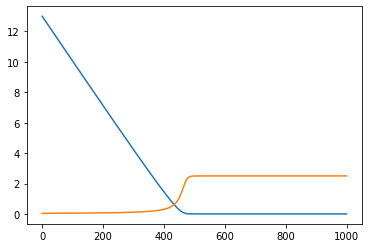

In [9]:
plt.plot(P[0:1000]) # Pathogen Not replinishing itself
plt.plot(M[0:1000]) 